 ## Title:Data Analysis of Indian Start up Ecosystem

### Business Understanding
This initial phase focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition, and a preliminary plan designed to achieve the objectives.

### Project Description:
This project aims to analyze funding trends in the Indian start-up ecosystem from 2018 to 2021. By examining data on funding received by start-ups and investor profiles, we seek to gain insights into the dynamics of the ecosystem and identify factors influencing funding trends. The ultimate goal is to provide recommendations for stakeholders interested in the Indian start-up market.



### Objectives
-To identity which Sector to invest in

-To examine the amount to invest in a chosen sector

-To identify companies receiving highest funding

-To identify locations ideal for investment

-To examine the distribution of funds across stages

### Questions
-What is the correlation between Sector and Funding 

-What is the distribution of funding across sectors

-What is the distribution of funds across different stages 

-What is the location with most start ups

-What is the distribution of funding per location(Top 5)


### Hypothesis
H0: Fintech Sector receives the most investment

HA: Fintech Sector does not receive the most investment



## Data Understanding

### Importing all necessary packages

In [179]:
# importing  libraries
import pyodbc 
from dotenv import dotenv_values 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn
from scipy import stats 
import os 
import seaborn as sns
import numpy as np
import re

warnings.filterwarnings('ignore')


In [180]:
# loading environment variables
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [181]:
connection = pyodbc.connect(connection_string)

In [182]:
# Loading dataset 1 & 2

query1 = "select * from dbo.LP1_startup_funding2020" 
data1 = pd.read_sql(query1, connection)

query2 = "select * from dbo.LP1_startup_funding2021" 
data2 = pd.read_sql(query2, connection)

### Read Data

In [183]:
## display first five rows of the data set
data1.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [184]:
# checking data info 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [185]:
# dropping column 10 from dataset
data1 = data1.drop('column10', axis=1)

In [186]:
# Adding column funding_year
data1['funding_year']=2020

In [187]:
data1.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,funding_year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


In [188]:
# rename columns
data1.rename(columns={'Company_Brand':'CompanyName', 'What_it_does': 'AboutCompany'}, inplace=True)

In [189]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   1055 non-null   object 
 1   Founded       842 non-null    float64
 2   HeadQuarter   961 non-null    object 
 3   Sector        1042 non-null   object 
 4   AboutCompany  1055 non-null   object 
 5   Founders      1043 non-null   object 
 6   Investor      1017 non-null   object 
 7   Amount        801 non-null    float64
 8   Stage         591 non-null    object 
 9   funding_year  1055 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 82.5+ KB


In [190]:
data2.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [191]:
# checking data info
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [192]:
data2['funding_year']=2021

In [193]:
data2.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,funding_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021


In [194]:
# Rename columns
data2.rename(columns={'Company_Brand':'CompanyName', 'What_it_does': 'AboutCompany'}, inplace=True)

In [195]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   1209 non-null   object 
 1   Founded       1208 non-null   float64
 2   HeadQuarter   1208 non-null   object 
 3   Sector        1209 non-null   object 
 4   AboutCompany  1209 non-null   object 
 5   Founders      1205 non-null   object 
 6   Investor      1147 non-null   object 
 7   Amount        1206 non-null   object 
 8   Stage         781 non-null    object 
 9   funding_year  1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [196]:
# loading dataset 2018
data3= pd.read_csv('./startup_funding/startup_funding2018.csv',low_memory=False)

data3.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [197]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [198]:
# renaming cloumns for uniformity 
data3.rename(columns={'Industry': 'Sector', 'Company Name':'CompanyName', 'Round/Series': 'Stage', 'About Company': 'AboutCompany','Location': 'HeadQuarter'}, inplace=True)

In [199]:
data3['funding_year']=2018

In [200]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CompanyName   526 non-null    object
 1   Sector        526 non-null    object
 2   Stage         526 non-null    object
 3   Amount        526 non-null    object
 4   HeadQuarter   526 non-null    object
 5   AboutCompany  526 non-null    object
 6   funding_year  526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [201]:
# Loading dataset 2019
data4= pd.read_csv('./startup_funding/startup_funding2019.csv',low_memory=False)

data4.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [202]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [203]:
data4.rename(columns={'Amount($)': 'Amount', 'Company/Brand':'CompanyName', 'What it does': 'AboutCompany'}, inplace=True)

In [204]:
data4['funding_year']= 2019

In [205]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   89 non-null     object 
 1   Founded       60 non-null     float64
 2   HeadQuarter   70 non-null     object 
 3   Sector        84 non-null     object 
 4   AboutCompany  89 non-null     object 
 5   Founders      86 non-null     object 
 6   Investor      89 non-null     object 
 7   Amount        89 non-null     object 
 8   Stage         43 non-null     object 
 9   funding_year  89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [206]:
df = pd.concat([data1, data2, data3, data4])
df.to_csv('aba.csv')

In [207]:
df.head()

,CompanyName,Founded,HeadQuarter,Sector,AboutCompany,Founders,Investor,Amount,Stage,funding_year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [208]:
# Checking datatype and entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CompanyName   2879 non-null   object 
 1   Founded       2110 non-null   float64
 2   HeadQuarter   2765 non-null   object 
 3   Sector        2861 non-null   object 
 4   AboutCompany  2879 non-null   object 
 5   Founders      2334 non-null   object 
 6   Investor      2253 non-null   object 
 7   Amount        2622 non-null   object 
 8   Stage         1941 non-null   object 
 9   funding_year  2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 247.4+ KB


In [209]:
df.shape

(2879, 10)

In [210]:
# Changing column to lower string
df.columns = df.columns.str.lower()

In [211]:
df.head()

,companyname,founded,headquarter,sector,aboutcompany,founders,investor,amount,stage,funding_year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [212]:
df.rename(columns={'founded':'yearfounded'}, inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   companyname   2879 non-null   object 
 1   yearfounded   2110 non-null   float64
 2   headquarter   2765 non-null   object 
 3   sector        2861 non-null   object 
 4   aboutcompany  2879 non-null   object 
 5   founders      2334 non-null   object 
 6   investor      2253 non-null   object 
 7   amount        2622 non-null   object 
 8   stage         1941 non-null   object 
 9   funding_year  2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 247.4+ KB


### EDA

### Cleaning amount column

In [214]:

# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
   
    return string
   
def clean_amount(amount):    
    if isinstance(amount, str):
        # Convert to lowercase
        amount = amount.lower()
       
        # Remove any spaces
        amount = amount.replace(' ', '')
       
        # Remove commas
        amount = amount.replace(',', '')
       
        if amount == '' or amount == '—':
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of 1 INR = 0.012 USD
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * 0.012
       
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)
 
   
    return amount
 

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   companyname   2879 non-null   object 
 1   yearfounded   2110 non-null   float64
 2   headquarter   2765 non-null   object 
 3   sector        2861 non-null   object 
 4   aboutcompany  2879 non-null   object 
 5   founders      2334 non-null   object 
 6   investor      2253 non-null   object 
 7   amount        2622 non-null   object 
 8   stage         1941 non-null   object 
 9   funding_year  2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 247.4+ KB


### Cleaning Stage Column

In [216]:
df['stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', 'Angel',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt'

In [217]:

# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
   
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [218]:
df['stage']=df['stage'].apply(remove_website_link)

In [219]:

# Identify rows where 'investor' value is numeric using clean amount function
mask = df['investor'].apply(lambda x: pd.notna(clean_amount(x)))
 
# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = df['stage'].isna()
df.loc[mask & stage_mask, 'stage']    = df.loc[mask, 'amount']
 
# Update 'amount' column with 'investor' value
df.loc[mask, 'amount']                = df.loc[mask, 'investor']
 
# Set 'investor' to NaN
df.loc[mask, 'investor']              = np.nan
         
 

In [220]:

# Identify rows where 'stage' value is numeric using clean amount function
mask = df['stage'].apply(lambda x: pd.notna(clean_amount(x)))
 
# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = df.loc[mask, 'aboutcompany']
old_founder      = df.loc[mask, 'founders']
 
df.loc[mask, 'aboutcompany']    = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')
 
# Update 'founder' column using the old 'investor' value
df.loc[mask, 'founders']        = df.loc[mask, 'investor']
 
# Update 'investor' column using the old 'amount' value
df.loc[mask, 'investor']        = df.loc[mask, 'amount']
 
# Update 'amount' column using the old 'stage' value
df.loc[mask, 'amount']          = df.loc[mask, 'stage']
 
# Set 'stage' to NaN
df.loc[mask, 'stage']           = np.nan

In [221]:
df['amount']=[clean_amount(amount) for amount in df['amount']]

In [238]:

pd.options.display.float_format = '${:,.2f}'.format


In [241]:
df['amount'].unique()

array([2.0000000e-04, 1.0000000e-04,           nan, 4.0000000e-04,
       3.4000000e-04, 6.0000000e-04, 4.5000000e-02, 1.0000000e-03,
       2.0000000e-03, 1.2000000e-03, 6.6000000e-01, 1.2000000e-04,
       7.5000000e-03, 5.0000000e-03, 5.0000000e-04, 3.0000000e-03,
       1.0000000e-02, 1.4500000e-01, 1.0000000e-01, 2.1000000e-02,
       4.0000000e-03, 2.0000000e-02, 5.6000000e-04, 2.7500000e-04,
       4.5000000e-03, 1.5000000e-02, 3.9000000e-01, 7.0000000e-03,
       5.1000000e-03, 7.0000000e-01, 2.3000000e-03, 7.0000000e-04,
       1.9000000e-02, 9.0000000e-03, 4.0000000e-02, 7.5000000e-04,
       1.5000000e-03, 7.8000000e-03, 5.0000000e-02, 8.0000000e-02,
       3.0000000e-02, 1.7000000e-03, 2.5000000e-03, 4.0000000e-05,
       3.3000000e-02, 3.5000000e-02, 3.0000000e-04, 2.5000000e-02,
       3.5000000e-03, 2.0000000e-01, 6.0000000e-03, 1.3000000e-03,
       4.1000000e-03, 5.7500000e-04, 8.0000000e-04, 2.8000000e-02,
       1.8000000e-02, 3.2000000e-03, 9.0000000e-04, 2.5000000e

### Dealing with missing values

In [253]:
# checking null values
df.isna().sum()

companyname       0
yearfounded     769
headquarter     114
sector            0
aboutcompany      0
founders        545
investor        632
amount            0
stage           941
funding_year      0
dtype: int64

In [247]:
#variable for  an amount to fill in null values
median_amount = df['amount'].median()

df['amount'].fillna(median_amount, inplace =True)

In [252]:
#variable for sector to fill in null values
mode_sector = df['sector'].mode()[0]

df['sector'].fillna(mode_sector, inplace =True)

In [255]:
df['sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

### Hypothesis Testing
-H0: Fintech Sector receives most investment

-HA: Fintech Sector does not receive most investment

In [256]:
fintech_sector = df[df['sector']=='Fintech']

non_fintech_sector = df[df['sector']!='Fintech']

In [257]:
# T-test
t,p =stats.ttest_ind(fintech_sector['amount'],non_fintech_sector['amount'])
print(f't-value:{t}')
print(f'p-value:{p}')


# Set Significance level
alpha = 0.05
 
#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is fintech sector receives the most investment.")
else:
   print("We failed to reject the null hypothesis. which is fintech sector receives the most investment.")

t-value:-0.2624520196791452
p-value:0.7929917625214568
We failed to reject the null hypothesis. which is fintech sector receives the most investment.


In [254]:
df['headquarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [222]:
location = df.groupby(['headquarter'])['headquarter'].agg(['count']).sort_values('count', ascending=False)


### Location with most strat ups

<Axes: xlabel='count', ylabel='headquarter'>

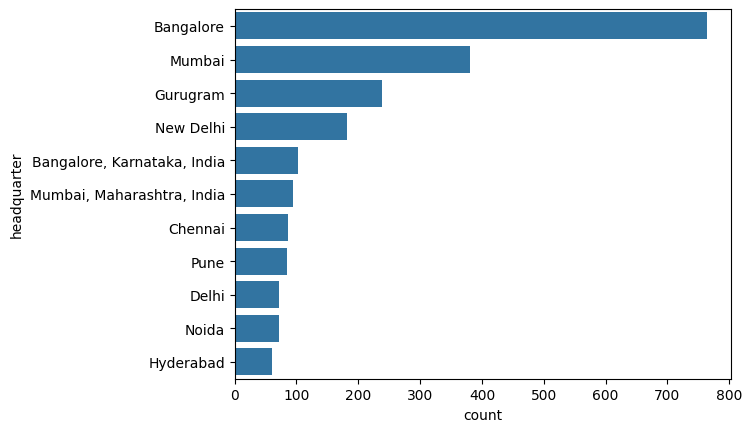

In [223]:
sns.barplot(y=location[:11].index, x= (location['count'])[:11])

### Correlation between sector and funding

In [258]:
correlation = df['sector'].corr(df['amount'])

ValueError: could not convert string to float: 'AgriTech'

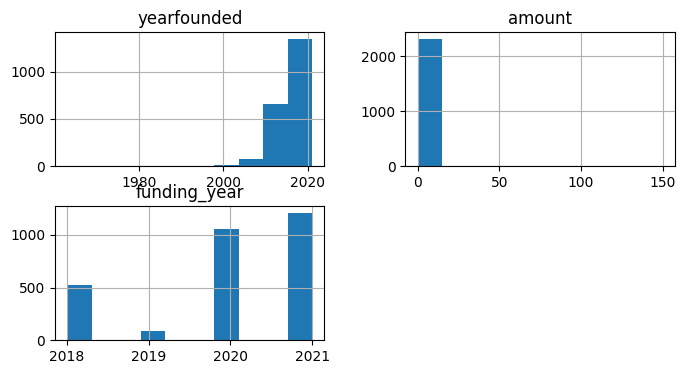

In [242]:
df.hist(figsize=(8,4))
plt.show()